In [7]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

In [43]:
data = pd.read_csv('experiment_1000_games.csv')
data


,sample_size,use_num_mines_constraint,wins,num_games,time_elapsed,samples_considered,samples_with_solutions,difficulty
0,"(4, 4)",True,337,1000,331.847469,34221,7842,Beginner (9x9)
1,"(4, 4)",False,336,1000,288.720067,34219,7819,Beginner (9x9)
2,"(5, 5)",True,802,1000,242.443622,22435,8508,Beginner (9x9)
3,"(5, 5)",False,793,1000,203.104077,22468,8505,Beginner (9x9)
4,"(6, 6)",True,804,1000,221.211598,17596,6699,Beginner (9x9)
5,"(6, 6)",False,794,1000,177.466128,17627,6696,Beginner (9x9)
6,"(7, 7)",True,806,1000,224.336340,14927,5891,Beginner (9x9)
7,"(7, 7)",False,794,1000,167.654714,14955,5892,Beginner (9x9)
8,"(8, 8)",True,809,1000,202.916784,12286,4835,Beginner (9x9)
9,"(8, 8)",False,794,1000,146.172597,12334,4850,Beginner (9x9)


In [11]:
x = data.samples_considered.sum()
y = data.samples_with_solutions.sum()
(x, y, f"{round(y/x, 2) * 100}% samples had solutions")

(2148898, 696639, '32.0% samples had solutions')

In [25]:
total_estimate = x * 100
solved_estimate = y * 100
proportion_solved = solved_estimate / total_estimate
print("{:.2e} total samples, {:.2e} with solutions ({:.2f}%)".format(total_estimate, solved_estimate, proportion_solved * 100))

2.15e+08 total samples, 6.97e+07 with solutions (32.42%)


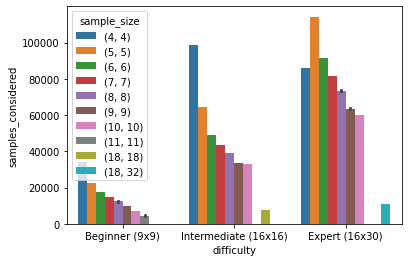

In [13]:
sns.barplot(x='difficulty', y='samples_considered', hue='sample_size', data=data)
plt.show()

In [64]:
m = data['use_num_mines_constraint'] == True
df1, df2 = data[m], data[~m]
df1 = df1.drop(columns=['use_num_mines_constraint'])
df2 = df2.drop(columns=['use_num_mines_constraint'])

df1.difficulty = df1.difficulty.apply(lambda x: x + ' \nwith mine count')
df2.difficulty = df2.difficulty.apply(lambda x: x + ' \nwithout mine count')

modified_data = pd.concat([df1, df2])

modified_data.sample_size = modified_data.sample_size.apply(lambda x: 'x'.join(x.strip('()').split(', ')))
full_grid_sizes = ['11x11', '18x18', '18x32']
modified_data.sample_size = modified_data.sample_size.replace(full_grid_sizes, 'whole grid')
modified_data.sample_size

0            4x4
2            5x5
4            6x6
6            7x7
8            8x8
10           9x9
12         10x10
14    whole grid
16           4x4
18           5x5
20           6x6
22           7x7
24           8x8
26           9x9
28         10x10
30    whole grid
32           4x4
34           5x5
36           6x6
38           7x7
40           8x8
42           9x9
44         10x10
46    whole grid
1            4x4
3            5x5
5            6x6
7            7x7
9            8x8
11           9x9
13         10x10
15    whole grid
17           4x4
19           5x5
21           6x6
23           7x7
25           8x8
27           9x9
29         10x10
31    whole grid
33           4x4
35           5x5
37           6x6
39           7x7
41           8x8
43           9x9
45         10x10
47    whole grid
Name: sample_size, dtype: object

In [61]:
order =['Beginner (9x9) \nwith mine count',
        'Beginner (9x9) \nwithout mine count',
        'Intermediate (16x16) \nwith mine count',
        'Intermediate (16x16) \nwithout mine count',
        'Expert (16x30) \nwith mine count',
        'Expert (16x30) \nwithout mine count',]
order

['Beginner (9x9) \nwith mine count',
 'Beginner (9x9) \nwithout mine count',
 'Intermediate (16x16) \nwith mine count',
 'Intermediate (16x16) \nwithout mine count',
 'Expert (16x30) \nwith mine count',
 'Expert (16x30) \nwithout mine count']

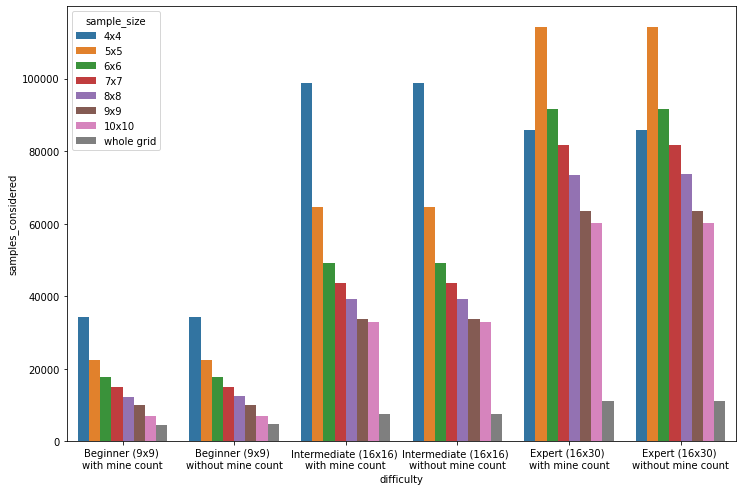

In [65]:
sns.barplot(x='difficulty',order=order, y='samples_considered', hue='sample_size', data=modified_data)
fig = plt.gcf()
fig.set_size_inches(12, 8)
plt.show()

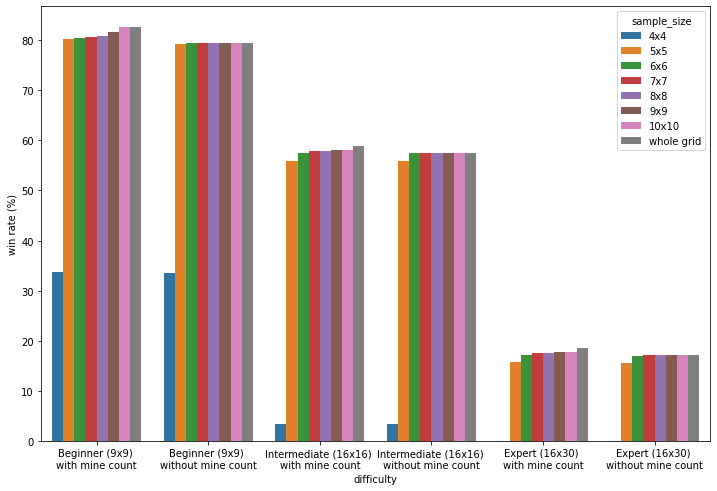

In [66]:
data2 = modified_data
data2['win rate (%)'] = (data2.wins / data2.num_games) * 100
sns.barplot(x='difficulty', order=order, y='win rate (%)', hue='sample_size', data=data2)
fig = plt.gcf()
fig.set_size_inches(12, 8)
plt.show()

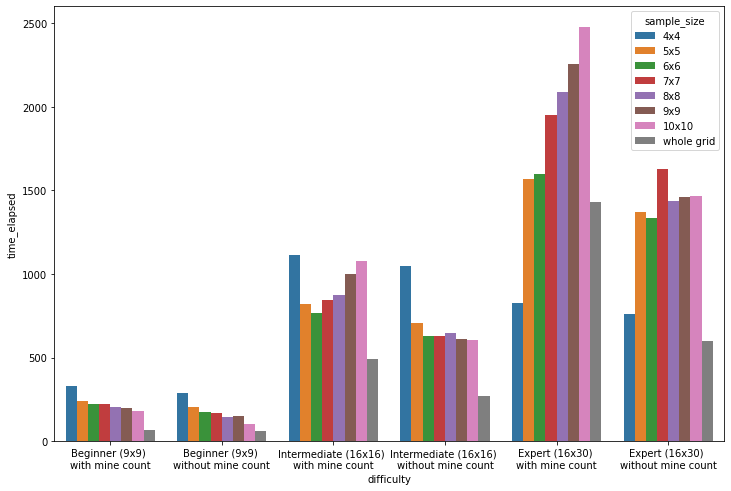

In [67]:
sns.barplot(x='difficulty', order=order, y='time_elapsed', hue='sample_size', data=data2)
fig = plt.gcf()
fig.set_size_inches(12, 8)
plt.show()

In [72]:
data2[data2.sample_size == "whole grid"]

,sample_size,wins,num_games,time_elapsed,samples_considered,samples_with_solutions,difficulty,win rate (%)
14,whole grid,826,1000,69.757486,4533,3275,Beginner (9x9) \nwith mine count,82.6
30,whole grid,589,1000,494.558674,7461,5276,Intermediate (16x16) \nwith mine count,58.9
46,whole grid,186,1000,1429.595657,11071,7594,Expert (16x30) \nwith mine count,18.6
15,whole grid,794,1000,59.170768,4622,3325,Beginner (9x9) \nwithout mine count,79.4
31,whole grid,575,1000,272.629904,7634,5363,Intermediate (16x16) \nwithout mine count,57.5
47,whole grid,172,1000,599.785770,11142,7612,Expert (16x30) \nwithout mine count,17.2
